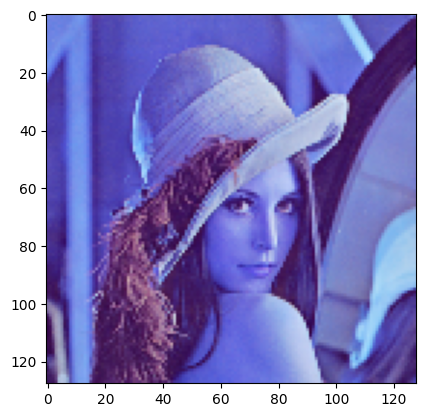

: 

In [5]:
import numpy as np                          # for ARRAYSs
import cv2 as cv                            # for OpenCV
#from google.colab.patches import cv2_imshow # for image display
from skimage import io                      # for algorithms for image processing
import matplotlib.pylab as plt              # provides a MATLAB-like interface
import copy                                 # help COPYing


url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
lenaImg = io.imread(url)
lenaImg = cv.cvtColor(lenaImg, cv.COLOR_RGB2BGR)
lenaImg = cv.resize(lenaImg,(128,128))

plt.imshow(lenaImg)

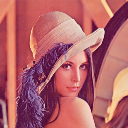

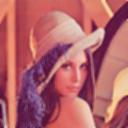

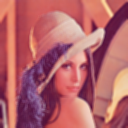

In [ ]:
"""3x3 MEAN BLUR"""

# KERNEL DEFINITION

kernel = np.array ([[1,1,1],[1,1,1],[1,1,1]])

# CONVOLUTION WITH LOOPS

mean3x3 = copy.copy(lenaImg).astype(float)

for y in range(1, lenaImg.shape[0]-1):
  for x in range(1, lenaImg.shape[1]-1):
    for c in range(lenaImg.shape[2]):
      sum = 0
      for ky in range(3):
        for kx in range(3):
          sum += lenaImg[y+ky-1, x+kx-1, c]*kernel[ky,kx]
      mean3x3[y,x,c] = sum/9.0


# CONVOLUTION WITH OPENCV FUNCTION FILTER2D
kernel_2 = np.ones((3, 3), np.float32) / 9
mean3x3_2 = cv.filter2D(src=lenaImg, ddepth=-1, kernel=kernel_2)

# DISPLAY THE IMAGES

cv2_imshow(lenaImg)
cv2_imshow(mean3x3)
cv2_imshow(mean3x3_2)

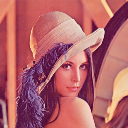

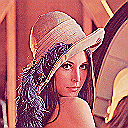

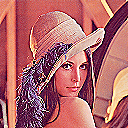

In [ ]:
"""3x3 EMBOSS"""

# KERNEL DEFINITION

#kernel = np.array ([[-1,0,0],[0,1,0],[0,0,0]])
#kernel_2 = np.array ([[-2,-1,0],[-1,1,1],[0,1,2]])
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])


# CONVOLUTION WITH LOOPS

emboss3x3 = copy.copy(lenaImg).astype(float)
#emboss3x3 = lenaImg.copy()

for y in range(1, lenaImg.shape[0]-1):
  for x in range(1, lenaImg.shape[1]-1):
    for c in range(lenaImg.shape[2]):
      sum = 0.0
      for ky in range(3):
        for kx in range(3):
          sum += (lenaImg[y+ky-1, x+kx-1, c]) * kernel[ky,kx]
      emboss3x3[y,x,c] = sum

# CONVOLUTION WITH OPENCV FUNCTION FILTER2D

emboss3x3_2 = cv.filter2D(src=lenaImg, ddepth=-1, kernel=kernel)

# DISPLAY THE IMAGES

cv2_imshow(lenaImg)
cv2_imshow(emboss3x3)
cv2_imshow(emboss3x3_2)

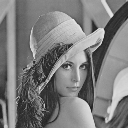

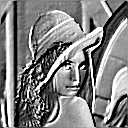

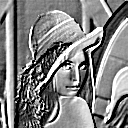

In [ ]:
"""3x3 EMBOSS in greyscale"""

# GREYSCALE IMAGE

lenaGrey = cv.cvtColor(lenaImg, cv.COLOR_BGR2GRAY)


# KERNEL DEFINITION

kernel = np.array ([[-2,-1,0],[-1,1,1],[0,1,2]])
#kernel = np.array ([[-1,0,0],[0,1,0],[0,0,0]])


# CONVOLUTION WITH LOOPS

emboss3x3_grey = copy.copy(lenaGrey).astype(int)

for y in range(1, lenaGrey.shape[0]-1):
  for x in range(1, lenaGrey.shape[1]-1):
      sum = 0
      for ky in range(3):
        for kx in range(3):
          sum += lenaGrey[y+ky-1, x+kx-1]*kernel[ky,kx]
      emboss3x3_grey[y,x] = sum

# CONVOLUTION WITH OPENCV FUNCTION FILTER2D

emboss3x3_grey_2 = cv.filter2D(src=lenaGrey, ddepth=-1, kernel=kernel)

# DISPLAY THE IMAGES

cv2_imshow(lenaGrey)
cv2_imshow(emboss3x3_grey)
cv2_imshow(emboss3x3_grey_2)


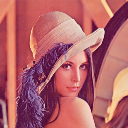

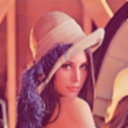

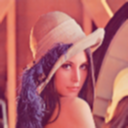

In [ ]:
"""3x3 GAUSIAN BLUR"""

# KERNEL DEFINITION

kernel = np.array ([[1,2,1],[2,4,2],[1,2,1]])

arraySum=np.sum(kernel)

# CONVOLUTION WITH LOOPS

gaussian3x3 = copy.copy(lenaImg).astype(float)

for y in range(1, lenaImg.shape[0]-1):
  for x in range(1, lenaImg.shape[1]-1):
    for c in range(lenaImg.shape[2]):
      sum = 0
      for ky in range(3):
        for kx in range(3):
          sum += lenaImg[y+ky-1, x+kx-1, c]*kernel[ky,kx]
      gaussian3x3[y,x,c] = sum/arraySum

# CONVOLUTION WITH OPENCV FUNCTION GaussianBlur

gaussian3x3_2 = cv.GaussianBlur(lenaImg, (3,3), 0)

# DISPLAY THE IMAGES

cv2_imshow(lenaImg)
cv2_imshow(gaussian3x3)
cv2_imshow(gaussian3x3_2)

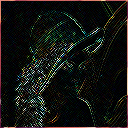

In [ ]:
"""3x3 GAUSIAN EDGE DETECTION """

gaussian_edge = copy.copy(lenaImg).astype(float)
kernel = np.array ([[1,-2,1],[-2,4,-2],[1,-2,1]])

for y in range(1, lenaImg.shape[0]-1):
  for x in range(1, lenaImg.shape[1]-1):
    for c in range(lenaImg.shape[2]):
      sum = 0
      for ky in range(3):
        for kx in range(3):
          sum += lenaImg[y+ky-1, x+kx-1, c]*kernel[ky,kx]
      gaussian_edge[y,x,c] = abs(sum)

cv2_imshow(gaussian_edge)


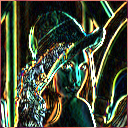

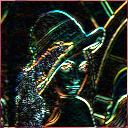

In [ ]:
"""3x3 SOBEL VERTICAL EDGE """
sobel_edge_v = copy.copy(lenaImg).astype(int)
sobel_edge_h = copy.copy(lenaImg).astype(int)

kernel1 = np.array ([[1,0,-1],[2,0,-2],[1,0,-1]])
kernel2 = np.array ([[1,2,1],[0,0,0],[-1,-2,-1]])

for x in range(1, lenaImg.shape[0]-1):
  for y in range(1, lenaImg.shape[1]-1):
    for c in range(lenaImg.shape[2]):
      sum1 = 0
      sum2 = 0
      for ky in range(3):
        for kx in range(3):
          sum1 += lenaImg[y+ky-1, x+kx-1, c]*kernel1[ky,kx]
          sum2 += lenaImg[y+ky-1, x+kx-1, c]*kernel2[ky,kx]
      sobel_edge_v[y,x,c] = abs(sum1)
      sobel_edge_h[y,x,c] = abs(sum2)

cv2_imshow(sobel_edge_v)
cv2_imshow(sobel_edge_h)

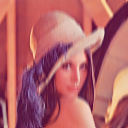

In [ ]:
"""5x1 MEAN BLUR """
mean5x1 = copy.copy(lenaImg).astype(float)
kernel = np.array([[1],[1],[1],[1],[1]])
arraySum=np.sum(kernel)

for y in range(2,lenaImg.shape[0]-2):
  for x in range(lenaImg.shape[1]):
    for c in range(lenaImg.shape[2]):
      sum = 0
      for ky in range(5):
          sum += lenaImg[y+ky-2, x, c] * kernel[ky,0]
      mean5x1[y,x,c] = sum / arraySum

cv2_imshow(mean5x1)


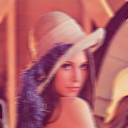

In [ ]:
"""1x5 MEAN BLUR """
mean1x5 = copy.copy(lenaImg).astype(float)
kernel = np.array([1,1,1,1,1])
arraySum=np.sum(kernel)

for y in range(lenaImg.shape[0]):
  for x in range(2,lenaImg.shape[1]-2):
    for c in range(lenaImg.shape[2]):
      sum = 0
      for kx in range(5):
          sum += lenaImg[y, x+kx-2, c] * kernel[kx]
      mean1x5[y,x,c] = sum / arraySum

cv2_imshow(mean1x5)


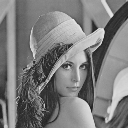

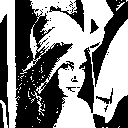

In [ ]:
"""Threshold"""
lenaGrey = cv.cvtColor(lenaImg, cv.COLOR_BGR2GRAY)
cv2_imshow(lenaGrey)
imageThreshold = copy.copy(lenaGrey)

threshold = 127

for y in range(lenaImg.shape[0]):
  for x in range(lenaImg.shape[1]):
    if (lenaGrey[y,x]<threshold):
      imageThreshold[y,x] = 0
    else:
      imageThreshold[y,x] = 255

cv2_imshow(imageThreshold)
